![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 2 - Clasificación de género de películas

El propósito de este proyecto es que puedan poner en práctica, en sus respectivos grupos de trabajo, sus conocimientos sobre técnicas de preprocesamiento, modelos predictivos de NLP, y la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 2: Clasificación de género de películas"

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 8. Sin embargo, es importante que avancen en la semana 7 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 8, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/2c54d005f76747fe83f77fbf8b3ec232).

## Datos para la predicción de género en películas

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/moviegenre.png)

En este proyecto se usará un conjunto de datos de géneros de películas. Cada observación contiene el título de una película, su año de lanzamiento, la sinopsis o plot de la película (resumen de la trama) y los géneros a los que pertenece (una película puede pertenercer a más de un género). Por ejemplo:
- Título: 'How to Be a Serial Killer'
- Plot: 'A serial killer decides to teach the secrets of his satisfying career to a video store clerk.'
- Generos: 'Comedy', 'Crime', 'Horror'

La idea es que usen estos datos para predecir la probabilidad de que una película pertenezca, dada la sinopsis, a cada uno de los géneros.

Agradecemos al profesor Fabio González, Ph.D. y a su alumno John Arevalo por proporcionar este conjunto de datos. Ver https://arxiv.org/abs/1702.01992

## Ejemplo predicción conjunto de test para envío a Kaggle
En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Importación librerías
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from nltk.stem import WordNetLemmatizer

In [19]:
import nltk
#nltk.download('wordnet')
#nltk.download('all')

In [20]:
# Carga de datos de archivo .csv
#dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
#dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)
PATH = "G:/Mi unidad/Cursos/Maestria MIAD/2.2_Machine Learning y Procesamiento de Lenguaje Natural/Proyecto 2/"
dataTraining = pd.read_csv(PATH+"dataTraining.zip", encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(PATH+"dataTesting-1.zip", encoding='UTF-8', index_col=0)

In [21]:
# Visualización datos de entrenamiento
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [22]:
# Visualización datos de test
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [51]:
# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000,stop_words='english')
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [52]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [53]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X_dtm, y_genres, test_size=0.30, random_state=42)

In [10]:
# Definición y entrenamiento
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [11]:
# Predicción del modelo de clasificación
y_pred_genres = clf.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7703737131620141

In [12]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [22]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.115936,0.097742,0.023667,0.033171,0.350883,0.121593,0.038935,0.501625,0.063223,0.112052,...,0.025849,0.066989,0.000080,0.326915,0.056593,0.007746,0.018275,0.181140,0.022994,0.019033
4,0.130519,0.094593,0.022446,0.061130,0.342924,0.219128,0.054908,0.525471,0.064037,0.065071,...,0.023979,0.065996,0.000439,0.172190,0.056970,0.009183,0.018986,0.208753,0.027562,0.019623
5,0.219088,0.116916,0.019175,0.092303,0.278692,0.460124,0.030849,0.595520,0.071616,0.081798,...,0.023715,0.321541,0.000946,0.275059,0.109710,0.015096,0.079912,0.411733,0.038717,0.023842
6,0.127627,0.107679,0.020988,0.078919,0.306709,0.143099,0.052145,0.561950,0.070046,0.072690,...,0.065193,0.115011,0.001434,0.227025,0.104296,0.008812,0.040535,0.225721,0.069887,0.017461
7,0.177181,0.173984,0.042258,0.035765,0.351817,0.260977,0.037887,0.407981,0.103738,0.132132,...,0.033129,0.082387,0.000071,0.169272,0.281801,0.008559,0.032381,0.243971,0.023557,0.037470


# FUNCIONES

In [58]:
def guardar(modelo,XTest,nombre):
    ypred = modelo.predict_proba(XTest)
    cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']
    ypred = pd.DataFrame(ypred,index=dataTesting.index, columns=cols)
    # Guardar predicciones en formato exigido en la competencia de kaggle
    archivo = nombre + '.csv'
    ypred.to_csv(archivo, index_label='ID')
    return ypred

In [59]:
def calculo_metrica(ypred,yTest,ypredTr,yTrain):
    AUC_Tr = roc_auc_score(yTrain, ypredTr, average='macro')
    AUC = roc_auc_score(yTest, ypred, average='macro')
    
    R2_Tr = r2_score(yTrain, ypredTr)
    R2 = r2_score(yTest, ypred)
    
    # Cálculo del desempeño del modelo utilizando el RMSE y el MAE
    print(f'El AUC del modelo es de {AUC}')
    print(f'El R2 del modelo es de {R2}')

    print(f'\nEl AUC del modelo en Train es de {AUC_Tr}')
    print(f'El R2 del modelo en Train es de {R2_Tr}')

In [60]:
def guardar2(modelo,XTest,nombre):
    ypred = modelo.predict(XTest)
    cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']
    ypred = pd.DataFrame(ypred,index=dataTesting.index, columns=cols)
    # Guardar predicciones en formato exigido en la competencia de kaggle
    archivo = nombre + '.csv'
    ypred.to_csv(archivo, index_label='ID')
    return ypred

In [61]:
def guardar3(modelo,XTest,nombre):
    ypred = modelo.predict_proba(XTest)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']
    ypred = pd.DataFrame(ypred,index=dataTesting.index, columns=cols)
    # Guardar predicciones en formato exigido en la competencia de kaggle
    archivo = nombre + '.csv'
    ypred.to_csv(archivo, index_label='ID')
    return ypred

In [62]:
wordnet_lemmatizer = WordNetLemmatizer()
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

# PREPROCESAMIENTO DATOS

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
import re
import os.path
import math
from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.cross_validation import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from scipy import sparse
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

In [46]:
import nltk
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import unicodedata

from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')

#plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\opatino\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\opatino\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
def remove_tags(sentence):
    html_tag = '<.*?>'
    cleaned_sentence = re.sub(html_tag, ' ',  sentence)
    return cleaned_sentence

In [5]:
print(remove_tags('<html><h2>Learning NLP</h2></html>'))
print(remove_tags(' <a>Movie-Plot</a>'))

  Learning NLP  
  Movie-Plot 


In [6]:
def remove_accents(sentence):
    cleaned_sentence = unicodedata.normalize('NFD', sentence)
    cleaned_sentence = cleaned_sentence.encode('ascii', 'ignore')
    cleaned_sentence = cleaned_sentence.decode("utf-8")
    return cleaned_sentence

In [7]:
def remove_punctuation(sentence):
    cleaned_sentence = re.sub(r'[?|!|\'|"|#]', '', sentence)
    cleaned_sentence = re.sub(r'[,|.|;|:|(|)|{|}|\|/|<|>]|-', ' ', cleaned_sentence)
    cleaned_sentence = cleaned_sentence.replace("\n"," ")
    return cleaned_sentence

In [8]:
def keep_alpha(sentence):
    alpha_sentence = re.sub('[^a-z A-Z]+', ' ', sentence)
    return alpha_sentence

In [9]:
def lower_case(sentence):
    lower_case_sentence = sentence.lower()
    return lower_case_sentence

In [10]:
def stemming(sentence):
    stemmer = SnowballStemmer("english")
    stemmed_words = [stemmer.stem(word) for word in sentence.split()]
    stemmed_sentence=' '.join(stemmed_words)
    return stemmed_sentence

In [11]:
def lemmatize_words(sentence):
    lem = WordNetLemmatizer()
    lemmatized_words = [lem.lemmatize(word, 'v') for word in sentence.split()]
    lemmatized_sentence=' '.join(lemmatized_words)
    return lemmatized_sentence

In [12]:
def remove_stop_words(sentence):
    stop_words = set(stopwords.words('english'))
    stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten',
                       'may','also','across','among','beside','however','yet','within'])
    no_stop_words=[word for word in sentence.split() if word not in stop_words]
    no_step_sentence = ' '.join(no_stop_words)
    return no_step_sentence

In [13]:
def text_preprocess(sentence):
    pre_processed_sentence = remove_tags(sentence)
    pre_processed_sentence = remove_accents(pre_processed_sentence)
    pre_processed_sentence = remove_punctuation(pre_processed_sentence)
    pre_processed_sentence = keep_alpha(pre_processed_sentence)
    pre_processed_sentence = lower_case(pre_processed_sentence)
    #pre_processed_sentence = stemming(pre_processed_sentence) # Use Lemmatize instead of stemming
    pre_processed_sentence = lemmatize_words(pre_processed_sentence)
    pre_processed_sentence = remove_stop_words(pre_processed_sentence)
    
    return pre_processed_sentence

In [47]:
X= dataTraining['plot'].copy()
indices = X.index
for i in indices:
    X[i] = text_preprocess(X[i])

In [72]:
X_test= dataTesting['plot'].copy()
indices = X_test.index
for i in indices:
    X_test[i] = text_preprocess(X_test[i])

Probar:

1. CountVectorizer con StopWords, 
2. lematización (ingles), 
3. y con  TfidfVectorizer

## Unigramas, bigramas, trigramas, stopwords y lematización

In [70]:
vect = CountVectorizer(stop_words='english',max_features=20000)
X_vec = vect.fit_transform(X)
XTrain, XTest, yTrain, yTest = train_test_split(X_vec, y_genres, test_size=0.30, random_state=8)

In [35]:
vect4 = CountVectorizer(lowercase=True, ngram_range=(1, 1), stop_words='english', analyzer=split_into_lemmas,max_features=10000)
X_vec_4 = vect4.fit_transform(dataTraining['plot'])
XTrain4, XTest4, yTrain4, yTest4 = train_test_split(X_vec_4, y_genres, test_size=0.33, random_state=8)

In [36]:
clfRF4 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=42)).fit(XTrain4, yTrain4)
ypredTrRF4 = clfRF4.predict_proba(XTrain4)
ypredRF4 = clfRF4.predict_proba(XTest4)

calculo_metrica(ypredRF4, yTest4, ypredTrRF4, yTrain4)

El AUC del modelo es de 0.8211471092811643
El R2 del modelo es de 0.18107714657849505

El AUC del modelo en Train es de 1.0
El R2 del modelo en Train es de 0.8834906673894061


## Stop words

In [17]:
vect2 = CountVectorizer(max_features=10000,stop_words='english')
X_vec_2 = vect2.fit_transform(dataTraining['plot'])
XTrain2, XTest2, yTrain2, yTest2 = train_test_split(X_vec_2, y_genres, test_size=0.30, random_state=42)

In [18]:
clfRF2 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=42)).fit(XTrain2, yTrain2)
ypredTrRF2 = clfRF2.predict_proba(XTrain2)
ypredRF2 = clfRF2.predict_proba(XTest2)

calculo_metrica(ypredRF2, yTest2, ypredTrRF2, yTrain2)

El AUC del modelo es de 0.7973629240003012
El R2 del modelo es de 0.16892775845776165

El AUC del modelo en Train es de 1.0
El R2 del modelo en Train es de 0.8838731958251115


## Max features 1000

In [89]:
ypredTr = clf.predict_proba(XTrain)
ypred = clf.predict_proba(XTest)

calculo_metrica(ypred, yTest, ypredTr, yTrain)

El AUC del modelo es de 0.7686765232291114
El R2 del modelo es de 0.08955613511376836

El AUC del modelo en Train es de 0.9344199073748213
El R2 del modelo en Train es de 0.26128814258554245


## Unigramas, bigramas, trigramas

In [19]:
vect1 = CountVectorizer(lowercase=True, ngram_range=(1, 1))
X_vec_1 = vect1.fit_transform(dataTraining['plot'])
XTrain1, XTest1, yTrain1, yTest1 = train_test_split(X_vec_1, y_genres, test_size=0.33, random_state=42)

In [20]:
clfRF1 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=42)).fit(XTrain1, yTrain1)
ypredTrRF1 = clfRF1.predict_proba(XTrain1)
ypredRF1 = clfRF1.predict_proba(XTest1)

calculo_metrica(ypredRF1, yTest1, ypredTrRF1, yTrain1)

El AUC del modelo es de 0.7925846141798107
El R2 del modelo es de 0.15556153119123095

El AUC del modelo en Train es de 1.0
El R2 del modelo en Train es de 0.8844611554305887


## Lematización

In [21]:
vect3 = CountVectorizer(lowercase=True, analyzer=split_into_lemmas)
X_vec_3 = vect3.fit_transform(dataTraining['plot'])
XTrain3, XTest3, yTrain3, yTest3 = train_test_split(X_vec_3, y_genres, test_size=0.33, random_state=42)

In [22]:
clfRF3 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=42)).fit(XTrain3, yTrain3)
ypredTrRF3 = clfRF3.predict_proba(XTrain3)
ypredRF3 = clfRF3.predict_proba(XTest3)

calculo_metrica(ypredRF3, yTest3, ypredTrRF3, yTrain3)

El AUC del modelo es de 0.7980287385971042
El R2 del modelo es de 0.1540170767051151

El AUC del modelo en Train es de 1.0
El R2 del modelo en Train es de 0.8845257399389096


## TfidfVectorizer

In [23]:
vect5 = TfidfVectorizer(lowercase=True, stop_words='english')
X_vec_5 = vect5.fit_transform(dataTraining['plot'])
XTrain5, XTest5, yTrain5, yTest5 = train_test_split(X_vec_5, y_genres, test_size=0.33, random_state=42)

In [24]:
clfRF5 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=42)).fit(XTrain5, yTrain5)
ypredTrRF5 = clfRF5.predict_proba(XTrain5)
ypredRF5 = clfRF5.predict_proba(XTest5)

calculo_metrica(ypredRF5, yTest5, ypredTrRF5, yTrain5)

El AUC del modelo es de 0.7967147889754017
El R2 del modelo es de 0.15910156567739364

El AUC del modelo en Train es de 1.0
El R2 del modelo en Train es de 0.8850786523903759


# CALIBRACIÓN

## Random Forest

In [27]:
clfRF1 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))
clfRF1.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [28]:
ypredTrRF1 = clfRF1.predict_proba(X_train)
ypredRF1 = clfRF1.predict_proba(X_test)
calculo_metrica(ypredRF1,y_test_genres,ypredTrRF1,y_train_genres)

El AUC del modelo es de 0.7703737131620141
El R2 del modelo es de 0.09011875118854669

El AUC del modelo en Train es de 0.9400828495118548
El R2 del modelo en Train es de 0.268097978664562


### RF Calibración 1

El parámetro max_depth que mejor calibra el modelo es 17
El parámetro max_depth que mejor calibra el modelo es 33


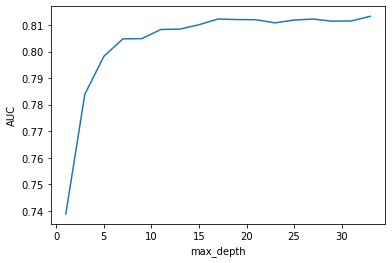

In [97]:
max_depth_range = range(45,55,1)
auc=[]
param=[]
for max_depth in max_depth_range:
    reg = RandomForestClassifier(max_depth = max_depth, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(max_depth)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_depth_range, auc)
plt.xlabel('max_depth')
plt.ylabel('AUC')

print(f'El parámetro max_depth que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro max_depth que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro max_feature que mejor calibra el modelo es 32
El parámetro max_feature que mejor calibra el modelo es 36


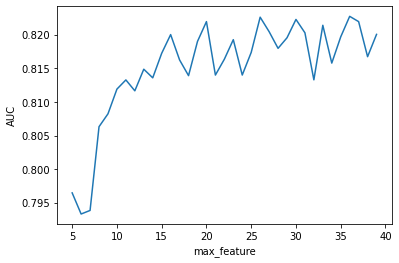

In [98]:
max_depth = 49 #27,49
max_features_range = range(95,120,2)
auc=[]
param=[]
for feauture in max_features_range:
    reg = RandomForestRegressor(max_depth = max_depth,  max_features = feauture, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(feauture)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_features_range, auc)
plt.xlabel('max_feature')
plt.ylabel('AUC')

print(f'El parámetro max_feature que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro max_feature que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro min leaf que mejor calibra el modelo es 4
El parámetro min leaf que mejor calibra el modelo es 4


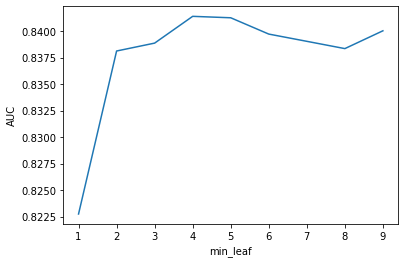

In [99]:
auc=[]
param=[]
max_features = 117 #90,117
min_samples_leaf_range = range(1,15)
for min_leaf in min_samples_leaf_range:
    reg = RandomForestRegressor(max_depth = max_depth,  max_features = max_features, min_samples_leaf = min_leaf, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(min_leaf)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_samples_leaf_range, auc)
plt.xlabel('min_leaf')
plt.ylabel('AUC')

print(f'El parámetro min leaf que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro min leaf que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro min split que mejor calibra el modelo es 1
El parámetro min split que mejor calibra el modelo es 1


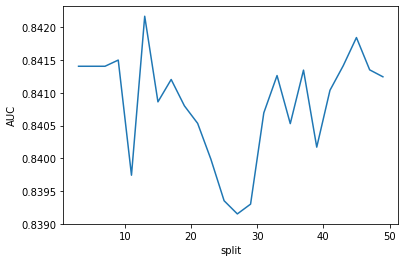

In [100]:
auc=[]
param=[]
min_samples_leaf=4
min_samples_split = range(1,20,1)
for split in min_samples_split:
    reg = RandomForestRegressor(max_depth = max_depth,  max_features = max_features, min_samples_leaf = min_samples_leaf, 
                                min_samples_split=split, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(split)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_samples_split, auc)
plt.xlabel('split')
plt.ylabel('AUC')

print(f'El parámetro min split que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro min split que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro estimator que mejor calibra el modelo es 7
El parámetro estimator que mejor calibra el modelo es 1000


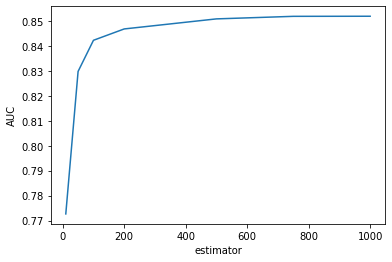

In [101]:
auc=[]
param=[]
estimator_range = range(2000,3000,100)
min_samples_split = 18
for estimator in estimator_range:
    reg = RandomForestRegressor(max_depth = max_depth,  max_features = max_features, min_samples_leaf = min_samples_leaf, 
                                min_samples_split=min_samples_split, n_estimators=estimator, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(estimator)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(estimator_range, auc)
plt.xlabel('estimator')
plt.ylabel('AUC')

print(f'El parámetro estimator que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro estimator que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro max_depth que mejor calibra el modelo es 17
El parámetro max_depth que mejor calibra el modelo es 33


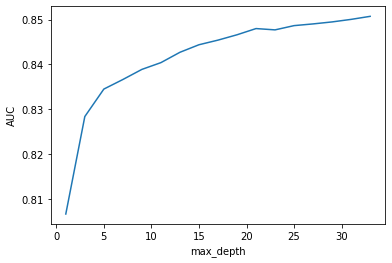

In [102]:
auc=[]
param=[]
for max_depth in max_depth_range:
    reg = RandomForestRegressor(max_depth = max_depth, max_features = 36, min_samples_leaf = 4, min_samples_split=13,n_estimators=500, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(max_depth)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_depth_range, auc)
plt.xlabel('max_depth')
plt.ylabel('AUC')

print(f'El parámetro max_depth que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro max_depth que mejor calibra el modelo es {param[auc.index(max(auc))]}')

In [119]:
clfRF21 = RandomForestClassifier(max_depth = 49, max_features = 117, min_samples_leaf = 4,
                                 min_samples_split = 18, n_estimators=3500, n_jobs=-1,random_state=8)
clfRF21.fit(XTrain2, yTrain2)
ypredTrRF2 = clfRF21.predict_proba(XTrain2)
ypredRF2 = clfRF21.predict_proba(XTest2)

In [120]:
ypredRF2=np.array(ypredRF2)
ypredRF2=np.array(ypredRF2[:,:,1]).T
ypredTrRF2=np.array(ypredTrRF2)
ypredTrRF2=np.array(ypredTrRF2[:,:,1]).T

In [121]:
calculo_metrica(ypredRF2, yTest2, ypredTrRF2, yTrain2)

El AUC del modelo es de 0.8412162531227447
El R2 del modelo es de 0.10637783115903236

El AUC del modelo en Train es de 0.953571783630644
El R2 del modelo en Train es de 0.18229579453966308


In [140]:
clfRF21 = OneVsRestClassifier(RandomForestClassifier(max_depth = 33, max_features = 36, min_samples_leaf = 4, min_samples_split = 13, n_estimators=500, n_jobs=-1,random_state=8))
clfRF21.fit(XTrain2, yTrain2)
ypredTrRF2 = clfRF21.predict_proba(XTrain2)
ypredRF2 = clfRF21.predict_proba(XTest2)

calculo_metrica(ypredRF2, yTest2, ypredTrRF2, yTrain2)

El AUC del modelo es de 0.8213132860205775
El R2 del modelo es de 0.1183027748482605

El AUC del modelo en Train es de 0.9504952535311206
El R2 del modelo en Train es de 0.20488135065077517


In [109]:
X_test_dtm = vect2.transform(dataTesting['plot'])
guardar(regRF2,X_test_dtm,"RF1_opt")

ValueError: Must pass 2-d input. shape=(24, 3383, 2)

In [141]:
X_test_dtm = vect2.transform(dataTesting['plot'])
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clfRF21.predict_proba(X_test_dtm)

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('RF_op1.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.097205,0.089558,0.019884,0.031337,0.349968,0.117599,0.032763,0.498448,0.062726,0.100186,...,0.051367,0.060418,0.000075,0.347146,0.047831,0.016613,0.018564,0.174757,0.018605,0.017646
4,0.104273,0.094230,0.031378,0.054876,0.334477,0.174717,0.042867,0.528538,0.070962,0.047878,...,0.029876,0.051700,0.000542,0.146826,0.038398,0.009322,0.012048,0.190885,0.026132,0.013099
5,0.179541,0.098119,0.021050,0.079601,0.281750,0.459855,0.045956,0.650316,0.067582,0.092579,...,0.064097,0.248410,0.000343,0.287726,0.097470,0.011438,0.038280,0.434039,0.057276,0.032586
6,0.153771,0.102732,0.016300,0.058946,0.311637,0.129329,0.075960,0.580797,0.068316,0.067708,...,0.048648,0.107899,0.002598,0.270265,0.123639,0.006031,0.031832,0.302042,0.072363,0.022577
7,0.210300,0.144137,0.021058,0.055252,0.328511,0.249707,0.057604,0.394253,0.077430,0.149217,...,0.030345,0.097792,0.001181,0.200954,0.313086,0.016419,0.019441,0.280485,0.026034,0.021887


### RF Calibración 2 Vec4

El parámetro max_depth que mejor calibra el modelo es 19
El parámetro max_depth que mejor calibra el modelo es 19


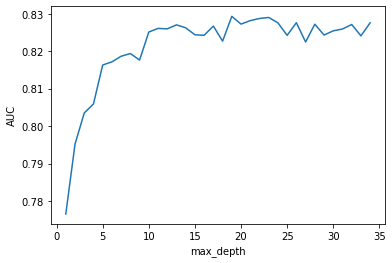

In [52]:
max_depth_range = range(1,35,1)
auc=[]
param=[]
for max_depth in max_depth_range:
    reg = RandomForestClassifier(max_depth = max_depth, n_jobs=-1,random_state=8)
    reg.fit(XTrain, yTrain)
    ypred = reg.predict_proba(XTest)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(max_depth)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_depth_range, auc)
plt.xlabel('max_depth')
plt.ylabel('AUC')

print(f'El parámetro max_depth que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro max_depth que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro max_feature que mejor calibra el modelo es 13
El parámetro max_feature que mejor calibra el modelo es 70


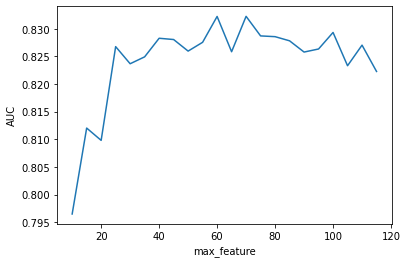

In [54]:
max_depth = 19 #27,49
max_features_range = range(10,120,5)
auc=[]
param=[]
for feauture in max_features_range:
    reg = RandomForestClassifier(max_depth = max_depth,  max_features = feauture, n_jobs=-1,random_state=8)
    reg.fit(XTrain4, yTrain4)
    ypred = reg.predict_proba(XTest4)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(feauture)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_features_range, auc)
plt.xlabel('max_feature')
plt.ylabel('AUC')

print(f'El parámetro max_feature que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro max_feature que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro min leaf que mejor calibra el modelo es 14
El parámetro min leaf que mejor calibra el modelo es 14


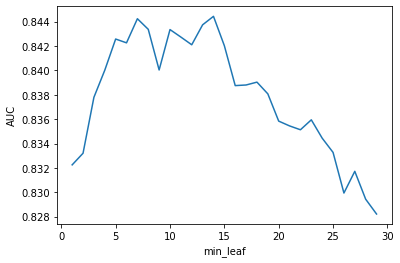

In [55]:
auc=[]
param=[]
max_features = 70 #90,117
min_samples_leaf_range = range(1,30)
for min_leaf in min_samples_leaf_range:
    reg = RandomForestClassifier(max_depth = max_depth,  max_features = max_features, min_samples_leaf = min_leaf, n_jobs=-1,random_state=8)
    reg.fit(XTrain4, yTrain4)
    ypred = reg.predict_proba(XTest4)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(min_leaf)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_samples_leaf_range, auc)
plt.xlabel('min_leaf')
plt.ylabel('AUC')

print(f'El parámetro min leaf que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro min leaf que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro min split que mejor calibra el modelo es 13
El parámetro min split que mejor calibra el modelo es 0.13


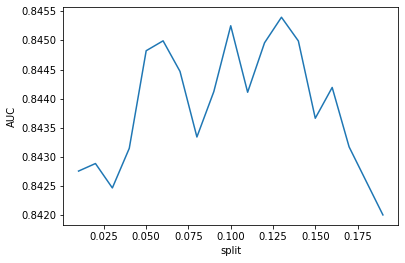

In [64]:
auc=[]
param=[]
min_samples_leaf=14
min_samples_split = [i/100.0 for i in range(1,20)]
#min_samples_split = range(2,30)
for split in min_samples_split:
    reg = RandomForestClassifier(max_depth = max_depth,  max_features = max_features, min_samples_leaf = min_samples_leaf, 
                                min_samples_split=split, n_jobs=-1,random_state=8)
    reg.fit(XTrain4, yTrain4)
    ypred = reg.predict_proba(XTest4)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(split)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_samples_split, auc)
plt.xlabel('split')
plt.ylabel('AUC')

print(f'El parámetro min split que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro min split que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro estimator que mejor calibra el modelo es 7
El parámetro estimator que mejor calibra el modelo es 700


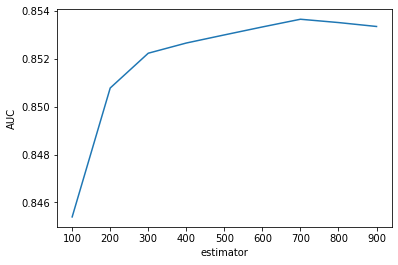

In [67]:
auc=[]
param=[]
estimator_range = range(100,1000,100)
min_samples_split = 0.13
for estimator in estimator_range:
    reg = RandomForestClassifier(max_depth = max_depth,  max_features = max_features, min_samples_leaf = min_samples_leaf, 
                                min_samples_split=min_samples_split, n_estimators=estimator, n_jobs=-1,random_state=8)
    reg.fit(XTrain4, yTrain4)
    ypred = reg.predict_proba(XTest4)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(estimator)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(estimator_range, auc)
plt.xlabel('estimator')
plt.ylabel('AUC')

print(f'El parámetro estimator que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro estimator que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro max_depth que mejor calibra el modelo es 9
El parámetro max_depth que mejor calibra el modelo es 30


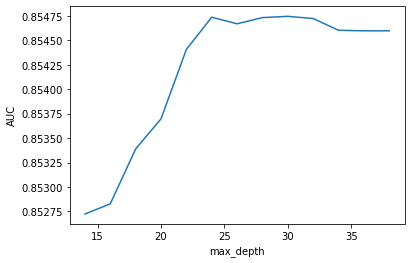

In [68]:
auc=[]
param=[]
estimator = 700
max_depth_range = range(14,40,2)
for max_depth in max_depth_range:
    reg = RandomForestClassifier(max_depth = max_depth,  max_features = max_features, min_samples_leaf = min_samples_leaf, 
                                min_samples_split=min_samples_split, n_estimators=estimator, n_jobs=-1,random_state=8)
    reg.fit(XTrain4, yTrain4)
    ypred = reg.predict_proba(XTest4)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(max_depth)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_depth_range, auc)
plt.xlabel('max_depth')
plt.ylabel('AUC')

print(f'El parámetro max_depth que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro max_depth que mejor calibra el modelo es {param[auc.index(max(auc))]}')

In [70]:
clfRF41 = RandomForestClassifier(max_depth = 30, max_features = max_features, min_samples_leaf = min_samples_leaf,
                                 min_samples_split = min_samples_split, n_estimators=700, n_jobs=-1,random_state=8)
clfRF41.fit(XTrain4, yTrain4)
ypredTrRF4 = clfRF41.predict_proba(XTrain4)
ypredRF4 = clfRF41.predict_proba(XTest4)

In [71]:
ypredRF4=np.array(ypredRF4)
ypredRF4=np.array(ypredRF4[:,:,1]).T
ypredTrRF4=np.array(ypredTrRF4)
ypredTrRF4=np.array(ypredTrRF4[:,:,1]).T

In [72]:
calculo_metrica(ypredRF4, yTest4, ypredTrRF4, yTrain4)

El AUC del modelo es de 0.8547467049355859
El R2 del modelo es de 0.054845388607401714

El AUC del modelo en Train es de 0.9045338419487848
El R2 del modelo en Train es de 0.06465548060174237


In [73]:
clfRF21 = OneVsRestClassifier(RandomForestClassifier(max_depth = 30, max_features = max_features, min_samples_leaf = min_samples_leaf,
                                                     min_samples_split = min_samples_split, n_estimators=700, n_jobs=-1,random_state=8))
clfRF21.fit(XTrain4, yTrain4)
ypredTrRF2 = clfRF21.predict_proba(XTrain4)
ypredRF2 = clfRF21.predict_proba(XTest4)

calculo_metrica(ypredRF4, yTest4, ypredTrRF4, yTrain4)

El AUC del modelo es de 0.8547467049355859
El R2 del modelo es de 0.054845388607401714

El AUC del modelo en Train es de 0.9045338419487848
El R2 del modelo en Train es de 0.06465548060174237


In [109]:
X_test_dtm = vect2.transform(dataTesting['plot'])
guardar(regRF2,X_test_dtm,"RF1_opt")

ValueError: Must pass 2-d input. shape=(24, 3383, 2)

In [141]:
X_test_dtm = vect2.transform(dataTesting['plot'])
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clfRF21.predict_proba(X_test_dtm)

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('RF_op1.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.097205,0.089558,0.019884,0.031337,0.349968,0.117599,0.032763,0.498448,0.062726,0.100186,...,0.051367,0.060418,0.000075,0.347146,0.047831,0.016613,0.018564,0.174757,0.018605,0.017646
4,0.104273,0.094230,0.031378,0.054876,0.334477,0.174717,0.042867,0.528538,0.070962,0.047878,...,0.029876,0.051700,0.000542,0.146826,0.038398,0.009322,0.012048,0.190885,0.026132,0.013099
5,0.179541,0.098119,0.021050,0.079601,0.281750,0.459855,0.045956,0.650316,0.067582,0.092579,...,0.064097,0.248410,0.000343,0.287726,0.097470,0.011438,0.038280,0.434039,0.057276,0.032586
6,0.153771,0.102732,0.016300,0.058946,0.311637,0.129329,0.075960,0.580797,0.068316,0.067708,...,0.048648,0.107899,0.002598,0.270265,0.123639,0.006031,0.031832,0.302042,0.072363,0.022577
7,0.210300,0.144137,0.021058,0.055252,0.328511,0.249707,0.057604,0.394253,0.077430,0.149217,...,0.030345,0.097792,0.001181,0.200954,0.313086,0.016419,0.019441,0.280485,0.026034,0.021887


### RF Calibración 3 Vec4

El parámetro max_depth que mejor calibra el modelo es 13
El parámetro max_depth que mejor calibra el modelo es 27


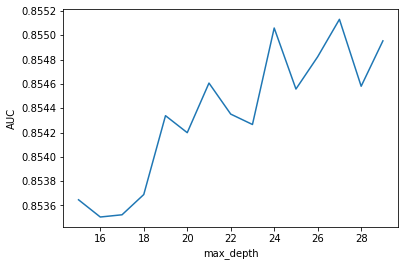

In [150]:
max_depth_range = range(15,30,1)
auc=[]
param=[]
for max_depth in max_depth_range:
    reg = RandomForestClassifier(max_depth = max_depth, max_features = max_features, min_samples_leaf = min_samples_leaf,
                                 min_samples_split = min_samples_split, n_estimators=100, n_jobs=-1,random_state=8)
    reg.fit(XTrain4, yTrain4)
    ypred = reg.predict_proba(XTest4)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(max_depth)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_depth_range, auc)
plt.xlabel('max_depth')
plt.ylabel('AUC')

print(f'El parámetro max_depth que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro max_depth que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro max_feature que mejor calibra el modelo es 8
El parámetro max_feature que mejor calibra el modelo es 17


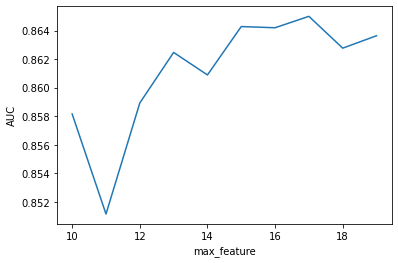

In [157]:
max_depth = 27 #27,49
max_features_range = range(10,20,1)
auc=[]
param=[]
for feauture in max_features_range:
    clf = RandomForestClassifier(max_depth = max_depth, max_features = feauture, min_samples_leaf = min_samples_leaf,
                                 min_samples_split = min_samples_split, n_estimators=700, n_jobs=-1,random_state=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(feauture)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_features_range, auc)
plt.xlabel('max_feature')
plt.ylabel('AUC')

print(f'El parámetro max_feature que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro max_feature que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro min leaf que mejor calibra el modelo es 4
El parámetro min leaf que mejor calibra el modelo es 4


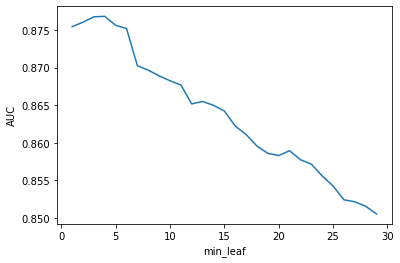

In [159]:
auc=[]
param=[]
max_features = 17 #90,117
min_samples_leaf_range = range(1,30)
for min_leaf in min_samples_leaf_range:
    clf = RandomForestClassifier(max_depth = max_depth, max_features = max_features, min_samples_leaf = min_leaf,
                                 min_samples_split = min_samples_split, n_estimators=700, n_jobs=-1,random_state=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(min_leaf)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_samples_leaf_range, auc)
plt.xlabel('min_leaf')
plt.ylabel('AUC')

print(f'El parámetro min leaf que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro min leaf que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro min split que mejor calibra el modelo es 3
El parámetro min split que mejor calibra el modelo es 0.03


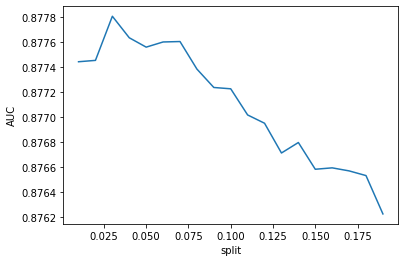

In [161]:
auc=[]
param=[]
min_samples_leaf=4
min_samples_split = [i/100.0 for i in range(1,20)]
#min_samples_split = range(2,30)
for split in min_samples_split:
    clf = RandomForestClassifier(max_depth = max_depth, max_features = max_features, min_samples_leaf = min_samples_leaf,
                                 min_samples_split = split, n_estimators=700, n_jobs=-1,random_state=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(split)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_samples_split, auc)
plt.xlabel('split')
plt.ylabel('AUC')

print(f'El parámetro min split que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro min split que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro estimator que mejor calibra el modelo es 6
El parámetro estimator que mejor calibra el modelo es 6000


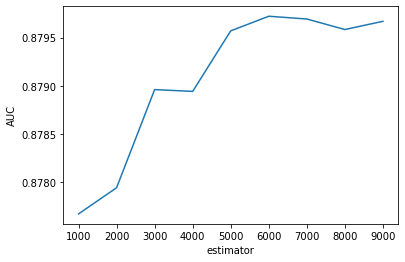

In [168]:
auc=[]
param=[]
estimator_range = range(1000,10000,1000)
min_samples_split = 0.03
for estimator in estimator_range:
    clf = RandomForestClassifier(max_depth = max_depth, max_features = max_features, min_samples_leaf = min_samples_leaf,
                                 min_samples_split = min_samples_split, n_estimators=estimator, n_jobs=-1,random_state=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    ypred=np.array(ypred)
    ypred=np.array(ypred[:,:,1]).T
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(estimator)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(estimator_range, auc)
plt.xlabel('estimator')
plt.ylabel('AUC')

print(f'El parámetro estimator que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro estimator que mejor calibra el modelo es {param[auc.index(max(auc))]}')

In [164]:
clfRF51 = RandomForestClassifier(max_depth = max_depth, max_features = max_features, min_samples_leaf = min_samples_leaf,
                                 min_samples_split = min_samples_split, n_estimators=1100, n_jobs=-1,random_state=8)
clfRF51.fit(XTrain4, yTrain4)
ypredTrRF5 = clfRF51.predict_proba(XTrain4)
ypredRF5 = clfRF51.predict_proba(XTest4)

ypredRF5=np.array(ypredRF5)
ypredRF5=np.array(ypredRF5[:,:,1]).T
ypredTrRF5=np.array(ypredTrRF5)
ypredTrRF5=np.array(ypredTrRF5[:,:,1]).T

calculo_metrica(ypredRF5, yTest4, ypredTrRF5, yTrain4)

El AUC del modelo es de 0.8782025069113497
El R2 del modelo es de 0.04227250986790685

El AUC del modelo en Train es de 0.9520183008676151
El R2 del modelo en Train es de 0.06265892292613408


In [56]:
min_samples_split = 0.03
min_samples_leaf=4
max_features = 17 #90,117
max_depth = 27 #27,49

In [71]:
clfRF51 = RandomForestClassifier(max_depth = max_depth, max_features = max_features, min_samples_leaf = min_samples_leaf,
                                 min_samples_split = min_samples_split, n_estimators=1000, n_jobs=-1,random_state=8)
clfRF51.fit(XTrain, yTrain)
ypredTrRF5 = clfRF51.predict_proba(XTrain)
ypredRF5 = clfRF51.predict_proba(XTest)

ypredRF5=np.array(ypredRF5)
ypredRF5=np.array(ypredRF5[:,:,1]).T
ypredTrRF5=np.array(ypredTrRF5)
ypredTrRF5=np.array(ypredTrRF5[:,:,1]).T

calculo_metrica(ypredRF5, yTest, ypredTrRF5, yTrain)

El AUC del modelo es de 0.8864654585610335
El R2 del modelo es de 0.027520886843599962

El AUC del modelo en Train es de 0.9506536173903454
El R2 del modelo en Train es de 0.03910813546671342


In [73]:
X_5_dtm = vect.transform(X)
clfRF5 = RandomForestClassifier(max_depth = max_depth, max_features = max_features, min_samples_leaf = min_samples_leaf,
                                 min_samples_split = min_samples_split, n_estimators=1100, n_jobs=-1,random_state=8)
clfRF5.fit(X_5_dtm, y_genres)
X_test_dtm = vect.transform(X_test)
guardar3(clfRF5,X_test_dtm,"RF6_opt")

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.157643,0.124635,0.032796,0.046762,0.387763,0.175985,0.055032,0.499833,0.086858,0.092467,...,0.034458,0.092777,0.000844,0.246833,0.089838,0.012416,0.033002,0.249647,0.041321,0.030509
4,0.162970,0.121027,0.032875,0.051469,0.384665,0.192612,0.057802,0.510146,0.082325,0.080898,...,0.033493,0.090280,0.001334,0.230456,0.083693,0.013136,0.033322,0.255037,0.044593,0.029582
5,0.166298,0.108881,0.023510,0.047275,0.349686,0.235953,0.044953,0.538999,0.068329,0.082071,...,0.028875,0.126354,0.000743,0.239282,0.083632,0.007768,0.031802,0.302976,0.040663,0.026175
6,0.164758,0.125619,0.028928,0.046924,0.373291,0.180771,0.046274,0.519164,0.079332,0.084526,...,0.032988,0.101896,0.000717,0.241520,0.095259,0.009878,0.033541,0.270422,0.050993,0.027977
7,0.169797,0.137137,0.036268,0.041384,0.362343,0.182275,0.049426,0.468602,0.086732,0.101593,...,0.030924,0.109316,0.000790,0.216010,0.136574,0.010937,0.026945,0.276855,0.035450,0.027082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11263,0.179407,0.121300,0.031788,0.046853,0.388411,0.191317,0.057308,0.496871,0.084880,0.084806,...,0.033196,0.088354,0.000862,0.228225,0.088352,0.013075,0.033004,0.262829,0.043484,0.029406
11265,0.147539,0.121151,0.034283,0.054637,0.398133,0.176315,0.057830,0.510281,0.087538,0.086746,...,0.043050,0.093619,0.000872,0.247749,0.089183,0.011928,0.035495,0.241033,0.042523,0.027014
11269,0.143015,0.120658,0.035141,0.047215,0.407449,0.167340,0.051530,0.509119,0.090307,0.087952,...,0.038062,0.090766,0.000863,0.261393,0.082740,0.012038,0.034627,0.234409,0.039735,0.028555
11270,0.170048,0.168150,0.039673,0.043183,0.413297,0.166401,0.046740,0.480198,0.110937,0.094279,...,0.043702,0.084370,0.000798,0.250320,0.088837,0.012087,0.033371,0.234512,0.039752,0.028476


In [167]:
X_5_dtm = vect4.transform(dataTraining['plot'])
clfRF5 = RandomForestClassifier(max_depth = max_depth, max_features = max_features, min_samples_leaf = min_samples_leaf,
                                 min_samples_split = min_samples_split, n_estimators=1100, n_jobs=-1,random_state=8)
clfRF5.fit(X_5_dtm, y_genres)
X_test_dtm = vect4.transform(dataTesting['plot'])
guardar3(clfRF5,X_test_dtm,"RF5_opt")

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.151810,0.121188,0.033306,0.043019,0.400839,0.175851,0.045893,0.502538,0.087686,0.087990,...,0.036267,0.091664,0.000680,0.267048,0.084424,0.011632,0.032012,0.249511,0.036602,0.030084
4,0.155414,0.110542,0.032547,0.060271,0.382325,0.185767,0.079603,0.503193,0.080959,0.072833,...,0.032578,0.079324,0.001394,0.207082,0.078861,0.016743,0.034512,0.237640,0.042846,0.028193
5,0.165785,0.108281,0.020086,0.041980,0.347770,0.243613,0.031699,0.561168,0.063289,0.082078,...,0.029259,0.141623,0.000629,0.263367,0.080844,0.005136,0.033329,0.319520,0.037444,0.022902
6,0.172579,0.130068,0.026623,0.041831,0.368522,0.185357,0.034643,0.532558,0.077488,0.090101,...,0.030586,0.109843,0.000542,0.244987,0.101500,0.007632,0.034412,0.280963,0.051784,0.028485
7,0.181587,0.151374,0.040090,0.039333,0.343729,0.185332,0.038043,0.465071,0.091891,0.120922,...,0.029593,0.111372,0.000433,0.209312,0.162161,0.009985,0.022486,0.286677,0.032641,0.026911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11263,0.184145,0.118302,0.032307,0.049485,0.388474,0.190216,0.069451,0.481887,0.083180,0.080631,...,0.033085,0.080328,0.001016,0.205619,0.087079,0.016343,0.032388,0.258143,0.041434,0.030369
11265,0.147640,0.128030,0.034929,0.054271,0.390198,0.166836,0.060619,0.500669,0.089693,0.090286,...,0.052204,0.094768,0.001053,0.253042,0.104731,0.011152,0.031973,0.237361,0.040945,0.026871
11269,0.137338,0.117330,0.038104,0.044126,0.423132,0.165643,0.050820,0.508545,0.092696,0.089720,...,0.039789,0.087741,0.000929,0.270406,0.080250,0.013820,0.033124,0.228565,0.037198,0.027953
11270,0.178073,0.180795,0.042226,0.042946,0.424622,0.164879,0.037917,0.478084,0.117736,0.099077,...,0.046103,0.083218,0.000755,0.260077,0.091181,0.010549,0.031247,0.231015,0.041930,0.028674


## XGB

In [114]:
#n_estimators=1000, scale_pos_weight=1, reg_alpha= 0.005
param_test = {
    'learning_rate':[0.01, 0.05, 0.1, 0.15],
    'gamma':[i/10.0 for i in range(0,5)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'max_depth':[10,20,25],
    'min_child_weight':[4,5,6],
    'subsample':[i/10.0 for i in range(6,10)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(n_jobs=-1,seed=8), 
 param_grid = param_test, scoring='roc_auc',n_jobs=-1, cv=3, verbose=True)
gsearch2.fit(XTrain,yTrain)
gsearch2.best_params_, gsearch2.best_score_

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


KeyboardInterrupt: 

In [79]:
# Definición método GridSearch para la calibración de parámetros definidos en nn_params
#OneVsRestClassifier()
modelo = XGBClassifier(n_jobs=-1,seed=8)
param_test = {
    'learning_rate':[0.01,0.05,0.1,0.15],
    'gamma':[i/10.0 for i in range(0,5)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'max_depth':[6,8,10],
    'min_child_weight':[4,5,6],
    'subsample':[i/10.0 for i in range(6,10)]}
    
rs = RandomizedSearchCV(modelo, param_distributions=param_test, n_iter=5, cv=3)
rs.fit(XTrain2, yTrain2)

print('Los mejores parametros segun Randomnized Search:', rs.best_params_)
print('Los mejores parametros segun Randomnized Search:', rs.best_score_)

Los mejores parametros segun Randomnized Search: {'subsample': 0.9, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.7}
Los mejores parametros segun Randomnized Search: 0.09377954244658726


In [80]:
# Implementación y ajuste del modelo de regresión de Random Forest calibrado con los datos de entrenamiento
regXGB1 = OneVsRestClassifier(XGBClassifier(learning_rate = 0.15, n_estimators=300, max_depth=10, min_child_weight=5, 
                       gamma=0.3, subsample=0.9, colsample_bytree=0.7, nthread=4, reg_alpha= 0.01, 
                       seed=27, n_jobs=-1)).fit(XTrain2, yTrain2)

In [82]:
ypredTrXGB1 = regXGB1.predict_proba(XTrain2)
ypredXGB1 = regXGB1.predict_proba(XTest2)
calculo_metrica(ypredXGB1,yTest2,ypredTrXGB1,yTrain2)

El AUC del modelo es de 0.8002062029495267
El R2 del modelo es de 0.1560865781317184

El AUC del modelo en Train es de 0.9738304482214067
El R2 del modelo en Train es de 0.6443343578213744


In [29]:
# Implementación y ajuste del modelo de regresión de Random Forest calibrado con los datos de entrenamiento
regXGB = XGBClassifier(learning_rate = 0.15, n_estimators=300, max_depth=10, min_child_weight=5, 
                       gamma=0.3, subsample=0.9, colsample_bytree=0.7, nthread=4, reg_alpha= 0.01, 
                       seed=27, n_jobs=-1).fit(XTrain2, yTrain2)

In [31]:
ypredTrXGB = regXGB.predict_proba(XTrain2)
ypredXGB = regXGB.predict_proba(XTest2)
calculo_metrica(ypredXGB,yTest2,ypredTrXGB,yTrain2)

El AUC del modelo es de 0.8010499774510018
El R2 del modelo es de 0.15708164240132724

El AUC del modelo en Train es de 0.9742033074018682
El R2 del modelo en Train es de 0.6438373248808781


### XGB Calibración

El parámetro que mejor calibra el modelo es 6
El parámetro que mejor calibra el modelo es 0.13999999999999996


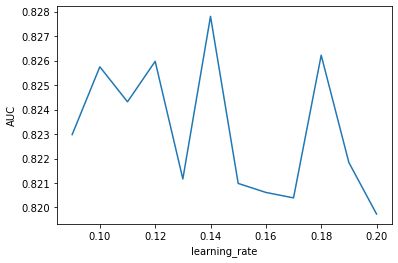

In [126]:
auc=[]
param=[]
learning_rate_range = np.arange(0.09, 0.2, 0.01)
for learning_rate in learning_rate_range:
    clf = XGBClassifier(learning_rate = learning_rate, nthread =-1,seed=8)
    scores = cross_val_score(clf, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(learning_rate)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(learning_rate_range, auc)
plt.xlabel('learning_rate')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 2
El parámetro que mejor calibra el modelo es 0.2


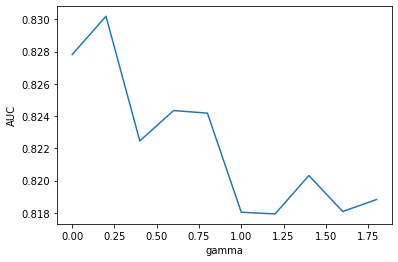

In [127]:
learning_rate = 0.14
auc=[]
param=[]
gamma_range=[i/10.0 for i in range(0,20,2)]
for gamma in gamma_range:
    reg = XGBClassifier(learning_rate = learning_rate, gamma=gamma, nthread =-1,seed=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(gamma)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(gamma_range, auc)
plt.xlabel('gamma')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 3
El parámetro que mejor calibra el modelo es 0.8


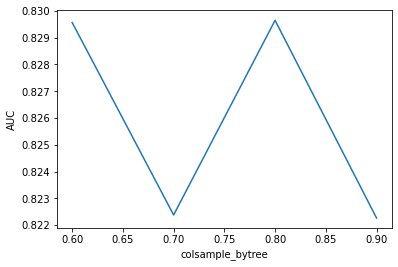

In [128]:
gamma = 0.2
auc=[]
param=[]
colsample_bytree_range = [i/10.0 for i in range(6,10)]
for colsample_bytree in colsample_bytree_range:
    reg = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, nthread =-1,seed=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(colsample_bytree)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(colsample_bytree_range, auc)
plt.xlabel('colsample_bytree')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 2
El parámetro que mejor calibra el modelo es 100


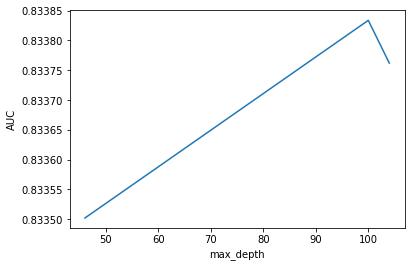

In [132]:
colsample_bytree = 0.8
auc=[]
param=[]
#max_depth_range = range(90,120,2)
max_depth_range = [46,100,104]
for max_depth in max_depth_range:
    reg = XGBClassifier(learning_rate = learning_rate, gamma=gamma, 
                        colsample_bytree=colsample_bytree, max_depth=max_depth, 
                        nthread =-1,seed=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(max_depth)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_depth_range, auc)
plt.xlabel('max_depth')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 1
El parámetro que mejor calibra el modelo es 1


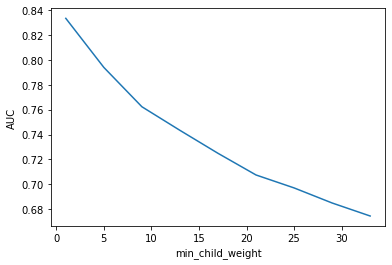

In [133]:
max_depth=99
auc=[]
param=[]
min_child_weight_range =range(1,36,4)
for min_child_weight in min_child_weight_range:
    reg = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight, nthread =-1,seed=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(min_child_weight)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_child_weight_range, auc)
plt.xlabel('min_child_weight')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 5
El parámetro que mejor calibra el modelo es 1.0


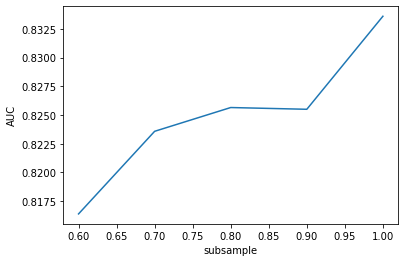

In [136]:
min_child_weight=1
auc=[]
param=[]
subsample_range =[i/10.0 for i in range(6,12)]
for subsample in subsample_range:
    reg = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, max_depth=max_depth, min_child_weight=min_child_weight,subsample=subsample, n_jobs =-1,seed=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(subsample)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(subsample_range, auc)
plt.xlabel('subsample')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro estimator que mejor calibra el modelo es 1
El parámetro estimator que mejor calibra el modelo es 100


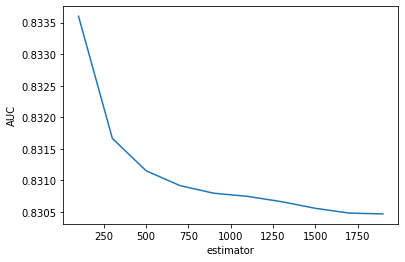

In [137]:
subsample = 1
auc=[]
param=[]
estimator_range = range(100,2000,200)
min_samples_split = 18
for estimator in estimator_range:
    reg = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, max_depth=max_depth, 
                        min_child_weight=min_child_weight,subsample=subsample, n_estimators = estimator, n_jobs =-1,seed=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(estimator)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(estimator_range, auc)
plt.xlabel('estimator')
plt.ylabel('AUC')

print(f'El parámetro estimator que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro estimator que mejor calibra el modelo es {param[auc.index(max(auc))]}')

In [135]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [154]:
clfXGB21 = OneVsRestClassifier(XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, max_depth=max_depth, min_child_weight=min_child_weight,subsample=subsample, nthread =-1,seed=8))
clfXGB21.fit(XTrain2, yTrain2)
ypredTrXGB2 = clfXGB21.predict_proba(XTrain2)
ypredXGB2 = clfXGB21.predict_proba(XTest2)

calculo_metrica(ypredXGB2, yTest2, ypredTrXGB2, yTrain2)

El AUC del modelo es de 0.8295068423211767
El R2 del modelo es de 0.18791393160289482

El AUC del modelo en Train es de 0.9991220058415848
El R2 del modelo en Train es de 0.8761152836995069


### XGB Calibración Vec4

El parámetro que mejor calibra el modelo es 3
El parámetro que mejor calibra el modelo es 0.10999999999999999


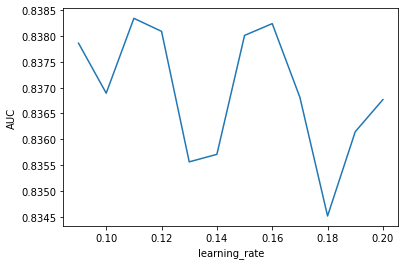

In [78]:
auc=[]
param=[]
learning_rate_range = np.arange(0.09, 0.2, 0.01)
for learning_rate in learning_rate_range:
    clf = XGBClassifier(learning_rate = learning_rate, n_jobs=-1,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(learning_rate)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(learning_rate_range, auc)
plt.xlabel('learning_rate')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 2
El parámetro que mejor calibra el modelo es 0.1


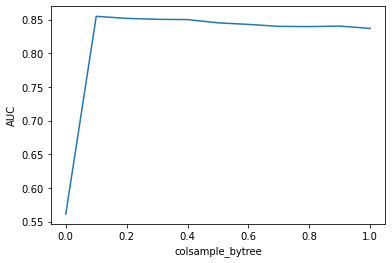

In [112]:
learning_rate = 0.1
auc=[]
param=[]
colsample_by_range = [i/10.0 for i in range(0,11)]
for colsample_bytree in colsample_by_range:
    clf = XGBClassifier(learning_rate = learning_rate, colsample_bytree=colsample_bytree,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(colsample_bytree)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(colsample_by_range, auc)
plt.xlabel('colsample_bytree')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 7
El parámetro que mejor calibra el modelo es 52


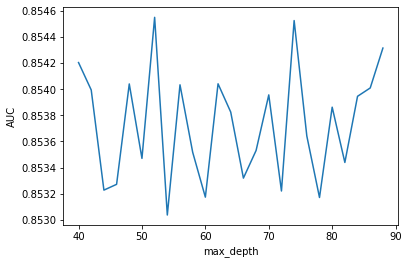

In [114]:
colsample_bytree = 0.1
auc=[]
param=[]
max_depth_range = range(40,90,2)
#max_depth_range = [46,100,10]
for max_depth in max_depth_range:
    clf = XGBClassifier(learning_rate = learning_rate, gamma=0, 
                        colsample_bytree=colsample_bytree, max_depth=max_depth, 
                        nthread =-1,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(max_depth)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_depth_range, auc)
plt.xlabel('max_depth')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 3
El parámetro que mejor calibra el modelo es 4


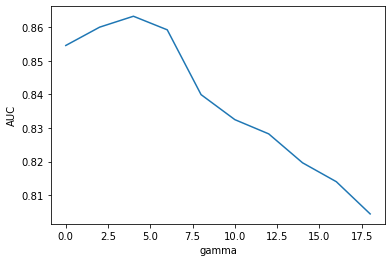

In [115]:
max_depth =  52
auc=[]
param=[]
#gamma_range=[i/10.0 for i in range(0,20,2)]
gamma_range=range(0,20,2)
for gamma in gamma_range:
    clf = XGBClassifier(learning_rate = learning_rate, gamma=gamma, 
                        colsample_bytree=colsample_bytree, max_depth=max_depth,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(gamma)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(gamma_range, auc)
plt.xlabel('gamma')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 2
El parámetro que mejor calibra el modelo es 1


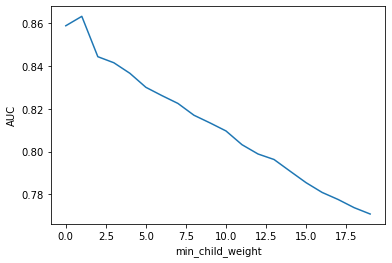

In [118]:
gamma = 4
auc=[]
param=[]
min_child_weight_range =range(0,20,1)
for min_child_weight in min_child_weight_range:
    clf = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight, seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(min_child_weight)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_child_weight_range, auc)
plt.xlabel('min_child_weight')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 11
El parámetro que mejor calibra el modelo es 1.0


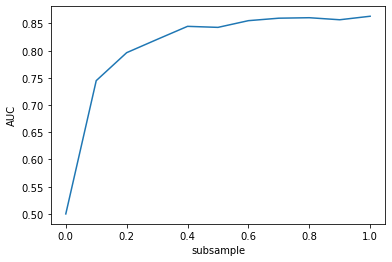

In [122]:
min_child_weight=1
auc=[]
param=[]
subsample_range =[i/10.0 for i in range(0,11)]
for subsample in subsample_range:
    clf = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight,subsample=subsample, 
                        n_jobs =-1,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(subsample)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(subsample_range, auc)
plt.xlabel('subsample')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro estimator que mejor calibra el modelo es 4
El parámetro estimator que mejor calibra el modelo es 410


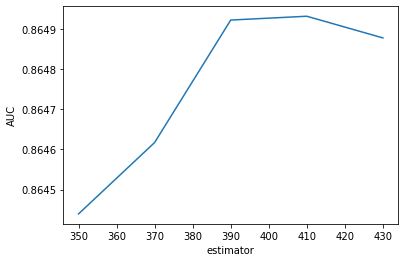

In [125]:
subsample = 1
auc=[]
param=[]
estimator_range = range(350,450,20)
min_samples_split = 18
for estimator in estimator_range:
    clf = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight, 
                        n_estimators = estimator, n_jobs =-1,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(estimator)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(estimator_range, auc)
plt.xlabel('estimator')
plt.ylabel('AUC')

print(f'El parámetro estimator que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro estimator que mejor calibra el modelo es {param[auc.index(max(auc))]}')

In [127]:
clfXGB41 = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight, 
                        n_estimators = 410, n_jobs =-1,seed=8)
clfXGB41.fit(XTrain4, yTrain4)
ypredTrXGB4 = clfXGB41.predict_proba(XTrain4)
ypredXGB4 = clfXGB41.predict_proba(XTest4)

calculo_metrica(ypredXGB4, yTest4, ypredTrXGB4, yTrain4)

El AUC del modelo es de 0.8649318093030942
El R2 del modelo es de 0.25553349124462216

El AUC del modelo en Train es de 0.9963521040740192
El R2 del modelo en Train es de 0.6647335141631281


In [131]:
X_4_dtm = vect4.transform(dataTraining['plot'])
clfXGB4 = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight, 
                        n_estimators = 410, n_jobs =-1,seed=8)
clfXGB4.fit(X_4_dtm, y_genres)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=52, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=410, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
X_test_dtm = vect4.transform(dataTesting['plot'])
guardar(clfXGB4,X_test_dtm,"XGB2_opt")

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.040757,0.037446,0.006455,0.010585,0.436478,0.040878,0.002815,0.496685,0.009121,0.086108,...,0.015216,0.024063,0.000234,0.614650,0.011468,0.003412,0.004329,0.260440,0.002988,0.009202
4,0.137836,0.013744,0.012623,0.245571,0.239409,0.301667,0.085366,0.657849,0.015139,0.008651,...,0.011086,0.032118,0.009783,0.039396,0.019423,0.011302,0.008031,0.242845,0.007730,0.011840
5,0.009666,0.003906,0.000870,0.032123,0.033270,0.858603,0.002208,0.861583,0.002494,0.006583,...,0.002032,0.275231,0.001219,0.099899,0.022087,0.000456,0.008613,0.207038,0.002143,0.002253
6,0.047531,0.018041,0.002586,0.023882,0.075037,0.046513,0.001343,0.903191,0.006795,0.003790,...,0.006538,0.101445,0.000191,0.008984,0.072960,0.000535,0.009765,0.479528,0.012992,0.005217
7,0.100497,0.054562,0.014960,0.023555,0.264105,0.027284,0.001454,0.250402,0.043167,0.202285,...,0.004605,0.048377,0.000330,0.040628,0.689092,0.000794,0.001926,0.149870,0.001243,0.002649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11263,0.656289,0.056934,0.010309,0.031395,0.302930,0.407523,0.013397,0.406494,0.049824,0.046574,...,0.012543,0.039819,0.001161,0.051152,0.063796,0.016409,0.009843,0.529617,0.009475,0.011257
11265,0.023742,0.042569,0.013635,0.047669,0.352984,0.042097,0.084034,0.549599,0.047302,0.019882,...,0.103727,0.018652,0.000535,0.379588,0.079455,0.005345,0.005800,0.021826,0.019386,0.002776
11269,0.024803,0.033219,0.109371,0.003503,0.737267,0.058603,0.007756,0.427182,0.068267,0.040517,...,0.065597,0.049220,0.000297,0.425046,0.011654,0.010169,0.007863,0.041916,0.006482,0.004678
11270,0.064609,0.726547,0.124927,0.008292,0.833055,0.062537,0.001385,0.183592,0.570337,0.092001,...,0.278775,0.057102,0.002558,0.325476,0.011330,0.001078,0.004342,0.052806,0.007315,0.003894


### XGB Calibración vec 4 2

El parámetro que mejor calibra el modelo es 3
El parámetro que mejor calibra el modelo es 0.10999999999999999


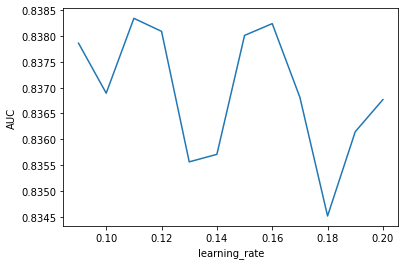

In [78]:
estimator = 410
auc=[]
param=[]
learning_rate_range = np.arange(0.05, 0.2, 0.01)
for learning_rate in learning_rate_range:
    clf = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight, 
                        n_estimators = estimator, n_jobs =-1,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(learning_rate)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(learning_rate_range, auc)
plt.xlabel('learning_rate')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 2
El parámetro que mejor calibra el modelo es 0.1


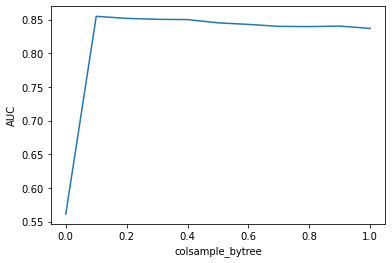

In [112]:
learning_rate = 0.1
auc=[]
param=[]
colsample_by_range = [i/10.0 for i in range(0,11)]
for colsample_bytree in colsample_by_range:
    clf = XGBClassifier(learning_rate = learning_rate, colsample_bytree=colsample_bytree,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(colsample_bytree)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(colsample_by_range, auc)
plt.xlabel('colsample_bytree')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 7
El parámetro que mejor calibra el modelo es 52


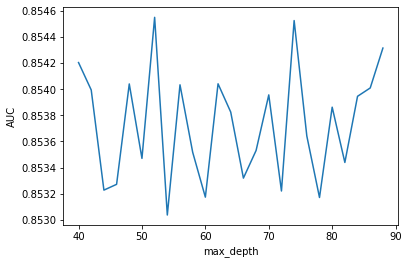

In [114]:
colsample_bytree = 0.1
auc=[]
param=[]
max_depth_range = range(40,90,2)
#max_depth_range = [46,100,10]
for max_depth in max_depth_range:
    clf = XGBClassifier(learning_rate = learning_rate, gamma=0, 
                        colsample_bytree=colsample_bytree, max_depth=max_depth, 
                        nthread =-1,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(max_depth)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_depth_range, auc)
plt.xlabel('max_depth')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 3
El parámetro que mejor calibra el modelo es 4


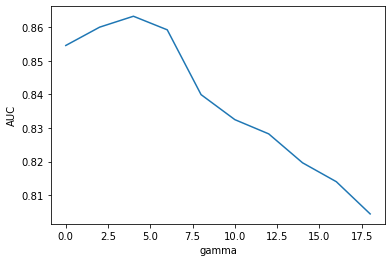

In [115]:
max_depth =  52
auc=[]
param=[]
#gamma_range=[i/10.0 for i in range(0,20,2)]
gamma_range=range(0,20,2)
for gamma in gamma_range:
    clf = XGBClassifier(learning_rate = learning_rate, gamma=gamma, 
                        colsample_bytree=colsample_bytree, max_depth=max_depth,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(gamma)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(gamma_range, auc)
plt.xlabel('gamma')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 2
El parámetro que mejor calibra el modelo es 1


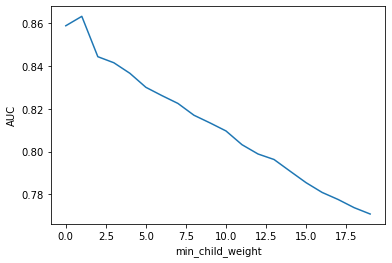

In [118]:
gamma = 4
auc=[]
param=[]
min_child_weight_range =range(0,20,1)
for min_child_weight in min_child_weight_range:
    clf = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight, seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(min_child_weight)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_child_weight_range, auc)
plt.xlabel('min_child_weight')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 11
El parámetro que mejor calibra el modelo es 1.0


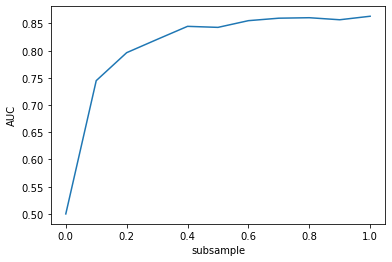

In [122]:
min_child_weight=1
auc=[]
param=[]
subsample_range =[i/10.0 for i in range(0,11)]
for subsample in subsample_range:
    clf = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight,subsample=subsample, 
                        n_jobs =-1,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(subsample)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(subsample_range, auc)
plt.xlabel('subsample')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro estimator que mejor calibra el modelo es 4
El parámetro estimator que mejor calibra el modelo es 410


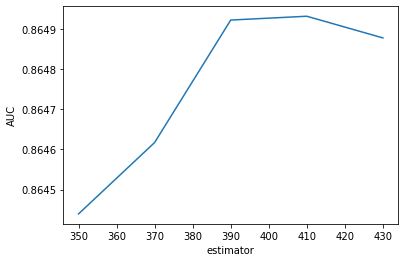

In [125]:
subsample = 1
auc=[]
param=[]
estimator_range = range(350,450,20)
min_samples_split = 18
for estimator in estimator_range:
    clf = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight, 
                        n_estimators = estimator, n_jobs =-1,seed=8)
    clf.fit(XTrain4, yTrain4)
    ypred = clf.predict_proba(XTest4)
    scores = roc_auc_score(yTest4, ypred, average='macro')
    auc.append(np.mean(scores))
    param.append(estimator)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(estimator_range, auc)
plt.xlabel('estimator')
plt.ylabel('AUC')

print(f'El parámetro estimator que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro estimator que mejor calibra el modelo es {param[auc.index(max(auc))]}')

In [127]:
clfXGB41 = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight, 
                        n_estimators = 410, n_jobs =-1,seed=8)
clfXGB41.fit(XTrain4, yTrain4)
ypredTrXGB4 = clfXGB41.predict_proba(XTrain4)
ypredXGB4 = clfXGB41.predict_proba(XTest4)

calculo_metrica(ypredXGB4, yTest4, ypredTrXGB4, yTrain4)

El AUC del modelo es de 0.8649318093030942
El R2 del modelo es de 0.25553349124462216

El AUC del modelo en Train es de 0.9963521040740192
El R2 del modelo en Train es de 0.6647335141631281


In [131]:
X_4_dtm = vect4.transform(dataTraining['plot'])
clfXGB4 = XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, 
                        max_depth=max_depth, min_child_weight=min_child_weight, 
                        n_estimators = 410, n_jobs =-1,seed=8)
clfXGB4.fit(X_4_dtm, y_genres)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=52, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=410, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
X_test_dtm = vect4.transform(dataTesting['plot'])
guardar(clfXGB4,X_test_dtm,"XGB2_opt")

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.040757,0.037446,0.006455,0.010585,0.436478,0.040878,0.002815,0.496685,0.009121,0.086108,...,0.015216,0.024063,0.000234,0.614650,0.011468,0.003412,0.004329,0.260440,0.002988,0.009202
4,0.137836,0.013744,0.012623,0.245571,0.239409,0.301667,0.085366,0.657849,0.015139,0.008651,...,0.011086,0.032118,0.009783,0.039396,0.019423,0.011302,0.008031,0.242845,0.007730,0.011840
5,0.009666,0.003906,0.000870,0.032123,0.033270,0.858603,0.002208,0.861583,0.002494,0.006583,...,0.002032,0.275231,0.001219,0.099899,0.022087,0.000456,0.008613,0.207038,0.002143,0.002253
6,0.047531,0.018041,0.002586,0.023882,0.075037,0.046513,0.001343,0.903191,0.006795,0.003790,...,0.006538,0.101445,0.000191,0.008984,0.072960,0.000535,0.009765,0.479528,0.012992,0.005217
7,0.100497,0.054562,0.014960,0.023555,0.264105,0.027284,0.001454,0.250402,0.043167,0.202285,...,0.004605,0.048377,0.000330,0.040628,0.689092,0.000794,0.001926,0.149870,0.001243,0.002649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11263,0.656289,0.056934,0.010309,0.031395,0.302930,0.407523,0.013397,0.406494,0.049824,0.046574,...,0.012543,0.039819,0.001161,0.051152,0.063796,0.016409,0.009843,0.529617,0.009475,0.011257
11265,0.023742,0.042569,0.013635,0.047669,0.352984,0.042097,0.084034,0.549599,0.047302,0.019882,...,0.103727,0.018652,0.000535,0.379588,0.079455,0.005345,0.005800,0.021826,0.019386,0.002776
11269,0.024803,0.033219,0.109371,0.003503,0.737267,0.058603,0.007756,0.427182,0.068267,0.040517,...,0.065597,0.049220,0.000297,0.425046,0.011654,0.010169,0.007863,0.041916,0.006482,0.004678
11270,0.064609,0.726547,0.124927,0.008292,0.833055,0.062537,0.001385,0.183592,0.570337,0.092001,...,0.278775,0.057102,0.002558,0.325476,0.011330,0.001078,0.004342,0.052806,0.007315,0.003894


## Red neuronal

In [23]:
import keras
from keras import backend as K
from keras import initializers
from keras import optimizers
from keras.optimizers import SGD
from keras import metrics
from keras.models import Sequential, Model
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers import Input
from keras.layers import Embedding
#from keras.layers.recurrent import LSTM
#from keras.layers.core import Dense, Dropout
#from keras.layers import Input
#from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from livelossplot import PlotLossesKeras

ImportError: cannot import name 'type_spec_registry' from 'tensorflow.python.framework' (C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\__init__.py)

In [27]:
output_var = yTrain4.shape[1]
dims = XTrain4.shape[1]

In [28]:
dims

34629

In [169]:
opt = SGD(lr=0.01, momentum=0.9)
NN3 = Sequential()
NN3.add(Dense(500, input_shape=(dims,),activation='relu'))
NN3.add(Dense(500, input_shape=(dims,),activation='relu'))
NN3.add(Dropout(0.7))
NN3.add(Dense(output_var, activation='softmax'))
NN3.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['AUC'])
print(NN3.summary())

NameError: name 'SGD' is not defined

In [69]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

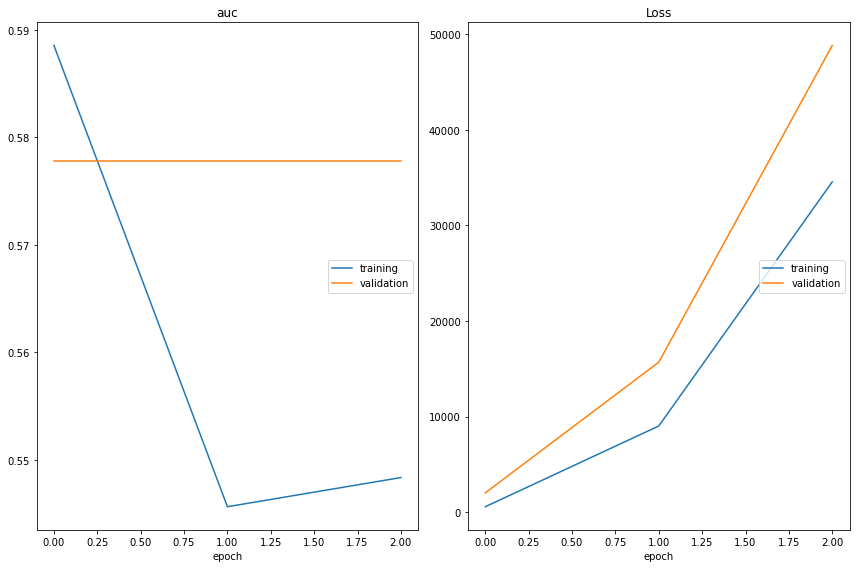

auc
	training         	 (min:    0.546, max:    0.589, cur:    0.548)
	validation       	 (min:    0.578, max:    0.578, cur:    0.578)
Loss
	training         	 (min:  552.550, max: 34566.117, cur: 34566.117)
	validation       	 (min: 2003.191, max: 48846.902, cur: 48846.902)
166/166 [==============================] - 119s 718ms/step - loss: 34566.1172 - auc: 0.5484 - val_loss: 48846.9023 - val_auc: 0.5778
Epoch 3: early stopping


In [70]:
NN3.fit(XTrain2, yTrain2, 
          verbose=1, 
          epochs=30, 
          validation_data=(XTest2, yTest2),
          callbacks=[PlotLossesKeras(),best_model, early_stop])

In [71]:
ypredTrNN3 = NN3.predict(XTrain2)
ypredNN3 = NN3.predict(XTest2)
calculo_metrica(ypredNN3,yTest2,ypredTrNN3,yTrain2)

82/82 [==============================] - 2s 19ms/step
El AUC del modelo es de 0.49961303539650775
El R2 del modelo es de -0.16101252431972166

El AUC del modelo en Train es de 0.49978684880944124
El R2 del modelo en Train es de -0.15642441986475417


## Keras classifier

In [ ]:
# Definición de función que crea una red neuronal a partir de diferentes parámetros (nn_model_params)
# En esta función se consideran 7 parámetos a calibrar, sin embargo se pueden agregar o quitar tantos como lo consideren pertinente
def nn_model_params(optimizer ,
                    neurons,
                    batch_size,
                    epochs,
                    activation,
                    patience,
                    loss):
    
    K.clear_session()

    # Definición red neuronal con la función Sequential()
    model = Sequential()
    
    # Definición de las capas de la red con el número de neuronas y la función de activación definidos en la función nn_model_params
    model.add(Dense(neurons, input_shape=(dims,), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(output_var, activation=activation))

    # Definición de función de perdida con parámetros definidos en la función nn_model_params
    model.compile(optimizer = optimizer, loss=loss)
    
    # Definición de la función EarlyStopping con parámetro definido en la función nn_model_params
    early_stopping = EarlyStopping(monitor="val_loss", patience = patience)

    # Entrenamiento de la red neuronal con parámetros definidos en la función nn_model_params
    model.fit(X_train, Y_train,
              validation_data = (X_val, Y_val),
              epochs=epochs,
              batch_size=batch_size,
              callbacks=[early_stopping, PlotLossesKeras()],
              verbose=True
              )
     
    return model

In [ ]:
# Definición de parámetros y sus valores sobre los que se va a calibrar
nn_params = {
    'optimizer': ['adam','sgd'],
    'activation': ['relu'],
    'batch_size': [64,128],
    'neurons':[64,256],
    'epochs':[20,50],
    'patience':[2,5],
    'loss':['mean_squared_error']
}

In [ ]:
# Definición de red neuronal usando el wrapper KerasRegressor y usando como argumento build_fn en la función nn_model_params
nn_model = KerasClassifier(build_fn=nn_model_params, verbose=0)

# Definición método GridSearch para la calibración de parámetros definidos en nn_params
rs = RandomizedSearchCV(nn_model, param_distributions=nn_params, n_iter=5, cv=3)
rs.fit(X_train, Y_train)

print('Los mejores parametros segun Randomnized Search:', rs.best_params_)

In [ ]:
nn_model = KerasRegressor(build_fn=nn_model_params, verbose=0)

# Definición método GridSearch para la calibración de parámetros definidos en nn_params
gs = GridSearchCV(nn_model, nn_params, cv=3)
gs.fit(X_train, Y_train)

print('Los mejores parametros segun Grid Search:', gs.best_params_)

## LSTM

In [ ]:
# Definición máximo largo de embedding
max_url_len = 150

# Codificación (embedding) de la URL con el vocabulario definido anteriormente
X = [x[:max_url_len] for x in X]
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [33]:
# Definición de embedding con el largo máximo definido anteriormente
max_url_len = 1500
X_pad = pad_sequences(XTrain4, maxlen=max_url_len)
X_pad

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [ ]:
# Separación de variables predictoras (X_pad) y variable de interés (y) en set de entrenamiento y test usando la función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

In [18]:
# Definición red neuronal con la función Sequential()
lstm = Sequential()

# Definición de la capa embedding
lstm.add(Embedding(len(XTrain2) + 1, 128, input_length=150))
# Definición de la capa recurrente LSTM
lstm.add(LSTM(32))
# Definición de dropout para evitar overfitting
lstm.add(Dropout(0.5))
# Definición capa densa con función sigmoide para predicción binaria final
lstm.add(Dense(yTrain2.shape[1], activation='sigmoid'))

# Definición de función de perdida.
lstm.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Impresión de la arquitectura de la red neuronal
lstm.summary()

NameError: name 'Sequential' is not defined

In [ ]:
# Entrenamiento de la red neuronal usando el set de entrenamiento
lstm.fit(XTrain2, yTrain2, validation_data=(XTest2, yTest2), 
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])
ypredLSTM = lstm.predict_proba(XTest2)
ypredTrLSTM = lstm.predict_proba(XTrain2)

In [ ]:
calculo_metrica(ypredLSTM, yTest2, ypredTrLSTM, yTrain2)

## MLP sklearn vec2

In [134]:
from sklearn.neural_network import MLPClassifier

In [135]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)

In [136]:
clf = GridSearchCV(mlp, parameter_space,scoring='roc_auc', n_jobs=-1, cv=3)
clf.fit(XTrain2, yTrain2)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [137]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.093 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.091 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.095 (+/-0.004) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.098 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.102 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.094 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'ada

In [139]:
y_true, y_pred = yTest2 , clf.predict(XTest2)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.57      0.40      0.47       387
           1       0.58      0.37      0.45       308
           2       0.68      0.15      0.25        86
           3       0.50      0.12      0.20       123
           4       0.62      0.60      0.61       938
           5       0.61      0.47      0.53       427
           6       0.85      0.53      0.65       114
           7       0.65      0.67      0.66      1178
           8       0.69      0.26      0.38       231
           9       0.57      0.25      0.35       211
          10       0.50      0.04      0.07        54
          11       0.63      0.17      0.27        70
          12       0.70      0.41      0.51       266
          13       0.72      0.34      0.46       111
          14       0.33      0.03      0.06        86
          15       0.47      0.23      0.31       222
          16       0.00      0.00      0.00         3
  

In [140]:
clfMLP = MLPClassifier(solver='adam', activation='tanh',alpha=0.0001,
                    hidden_layer_sizes=(100,),learning_rate='constant', random_state=1)
clfMLP.fit(XTrain2, yTrain2)

MLPClassifier(activation='tanh', random_state=1)

In [141]:
ypredMLP = clfMLP.predict_proba(XTest2)
ypredTrMLP = clfMLP.predict_proba(XTrain2)
calculo_metrica(ypredMLP, yTest2, ypredTrMLP, yTrain2)

El AUC del modelo es de 0.8143800868565315
El R2 del modelo es de 0.11442216312998378

El AUC del modelo en Train es de 1.0
El R2 del modelo en Train es de 0.999897492584792


## MLP sklearn vec4

In [147]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp = MLPClassifier(max_iter=100)

In [143]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=2)
clf.fit(XTrain4, yTrain4)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='roc_auc')

In [144]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
nan (+/-nan) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
nan (+/-nan) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
nan (+/-nan) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
nan (+/-nan) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
nan (+/-nan) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
nan (+/-nan) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
nan (+/-nan) fo

In [139]:
y_true, y_pred = yTest2 , clf.predict(XTest2)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.57      0.40      0.47       387
           1       0.58      0.37      0.45       308
           2       0.68      0.15      0.25        86
           3       0.50      0.12      0.20       123
           4       0.62      0.60      0.61       938
           5       0.61      0.47      0.53       427
           6       0.85      0.53      0.65       114
           7       0.65      0.67      0.66      1178
           8       0.69      0.26      0.38       231
           9       0.57      0.25      0.35       211
          10       0.50      0.04      0.07        54
          11       0.63      0.17      0.27        70
          12       0.70      0.41      0.51       266
          13       0.72      0.34      0.46       111
          14       0.33      0.03      0.06        86
          15       0.47      0.23      0.31       222
          16       0.00      0.00      0.00         3
  

In [145]:
clfMLP = MLPClassifier(solver='sgd', activation='tanh',alpha=0.0001,
                    hidden_layer_sizes=(50, 50, 50),learning_rate='constant', random_state=1)
clfMLP.fit(XTrain2, yTrain2)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50, 50),
              random_state=1, solver='sgd')

In [146]:
ypredMLP = clfMLP.predict_proba(XTest2)
ypredTrMLP = clfMLP.predict_proba(XTrain2)
calculo_metrica(ypredMLP, yTest2, ypredTrMLP, yTrain2)

El AUC del modelo es de 0.8058865616444946
El R2 del modelo es de 0.07425154288039881

El AUC del modelo en Train es de 0.9965103459155289
El R2 del modelo en Train es de 0.7498130848900617


# ENTRENAMIENTO

## Modelo BERT

In [30]:
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
# Cargar el modelo pre-entrenado y el tokenizador de BERT
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=10)  # Aquí se asume que hay 10 géneros de películas

# Sinopsis de ejemplo
sinopsis = "Un grupo de amigos se aventura en una emocionante búsqueda para encontrar un tesoro escondido."

# Preprocesamiento de la sinopsis
tokens = tokenizer.encode_plus(
    sinopsis,
    None,
    add_special_tokens=True,
    max_length=128,  # Ajusta la longitud máxima según tus necesidades
    padding='max_length',
    truncation=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='pt'  # Devuelve tensores de PyTorch
)

# Pasar los tensores a través del modelo
outputs = model(input_ids=tokens['input_ids'], attention_mask=tokens['attention_mask'])

# Obtener las predicciones de género
predictions = outputs.logits.argmax(dim=1).item()

# Mapeo de los índices de género a etiquetas de texto
genre_labels = ['Acción', 'Aventura', 'Comedia', 'Drama', 'Fantasía', 'Horror', 'Romance', 'Ciencia ficción', 'Suspense', 'Western']
predicted_genre = genre_labels[predictions]

# Imprimir el género predicho
print("Género predicho:", predicted_genre)

In [36]:
# Cargar el modelo pre-entrenado y el tokenizador de BERT
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=24)  # Aquí se asume que hay 10 géneros de películas

# Preprocesamiento de la sinopsis
tokens = tokenizer.encode_plus(
    dataTraining['plot'],
    None,
    add_special_tokens=True,
    max_length=1000,  # Ajusta la longitud máxima según tus necesidades
    padding='max_length',
    truncation=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='pt'  # Devuelve tensores de PyTorch
)

# Pasar los tensores a través del modelo
outputs = model(input_ids=tokens['input_ids'], attention_mask=tokens['attention_mask'])

# Obtener las predicciones de género
predictions = outputs.logits.argmax(dim=1).item()

# Mapeo de los índices de género a etiquetas de texto
#genre_labels = dataTraining['genres']
#predicted_genre = genre_labels[predictions]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

ValueError: Input 3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.

# DISPONIBILIZACIÓN